In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':120})

# Bước 1: Import data thô vào paython

<Thực hiện bước 1 khi trước đó bạn đã hiểu bối cảnh kinh doanh (business understanding) và hiểu data (data under standing), lúc này bảng dữ liệu đang ở dạng dữ liệu thô chưa qua xử lý>

In [18]:
df = pd.read_excel('OneBank.xlsx')

In [19]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.1,0


# Bước 2: Data Cleaning

< thực hiện bước 2 khi dữ liệu của bạn chưa sạch: bao gồm dọn dẹp, định dạng lại, xử lý duplicated, xử lý null: mean nếu nhãn là dữ liệu liên tục, mode nếu nhãn nếu dữ liệu rời rạc,.....>

In [20]:
#kiểm tra null
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [21]:
#kiểm tra dupicated
df.duplicated().sum()

0

In [22]:
# categorical Variables
categorical_variables = [col for col in df.columns if col in "O"
                        or df[col].nunique() <=11
                        and col not in "Exited"]

categorical_variables

['country',
 'gender',
 'tenure',
 'products_number',
 'credit_card',
 'active_member',
 'churn']

In [23]:
# Numeric Variables
numeric_variables = [col for col in df.columns if df[col].dtype != "object"
                        and df[col].nunique() >11
                        and col not in "CustomerId"]
numeric_variables

['customer_id', 'credit_score', 'age', 'balance']

### Ouliers

In [24]:
# To determine the threshold value for outliers
def outlier_thresholds(dataframe, variable, low_quantile=0.05, up_quantile=0.95):
    quantile_one = dataframe[variable].quantile(low_quantile)
    quantile_three = dataframe[variable].quantile(up_quantile)
    interquantile_range = quantile_three - quantile_one
    up_limit = quantile_three + 1.5 * interquantile_range
    low_limit = quantile_one - 1.5 * interquantile_range
    return low_limit, up_limit

In [25]:
# Are there any outliers in the variables
def has_outliers(dataframe, numeric_columns, plot=False):
   # variable_names = []
    for col in numeric_columns:
        low_limit, up_limit = outlier_thresholds(dataframe, col)
        if dataframe[(dataframe[col] > up_limit) | (dataframe[col] < low_limit)].any(axis=None):
            number_of_outliers = dataframe[(dataframe[col] > up_limit) | (dataframe[col] < low_limit)].shape[0]
            print(col, " : ", number_of_outliers, "outliers")
            #variable_names.append(col)
            if plot:
                sns.boxplot(x=dataframe[col])
                plt.show()
    #return variable_names

In [26]:
# There is no outlier
for var in numeric_variables:
    print(var, "has " , has_outliers(df, [var]),  "Outliers")

customer_id has  None Outliers
credit_score has  None Outliers
age has  None Outliers
balance has  None Outliers


### Feature engineering

## Check cái này xem nên thêm những tham số gì nhé tôi đọc báo đau mắt quá

In [27]:
# # we standardize tenure with age
# df["NewTenure"] = df["Tenure"]/df["Age"]
# df["NewCreditsScore"] = pd.qcut(df['CreditScore'], 6, labels = [1, 2, 3, 4, 5, 6])
# df["NewAgeScore"] = pd.qcut(df['Age'], 8, labels = [1, 2, 3, 4, 5, 6, 7, 8])
# df["NewBalanceScore"] = pd.qcut(df['Balance'].rank(method="first"), 5, labels = [1, 2, 3, 4, 5])
# df["NewEstSalaryScore"] = pd.qcut(df['EstimatedSalary'], 10, labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

Feature Interaction: Tìm hiểu thêm các tương tác giữa các biến số thông qua các phương pháp Polynomial Features hoặc Interaction Terms.

# Bước 3: EDA data

< khi dữ liệu đã sạch rồi, bạn cần hiểu càng sâu về dữ liệu càng tốt bằng cách vẽ các biểu đồ mô tả, thống kê, phân phối, ma trận tương quan, phân tán,.... Sau khi đã hiểu sâu về dữ liệu hơn, bạn sẽ thực hiển số hóa và chuẩn hóa dữ liệu thành dạng nhị phân và dạng số để máy tính hiểu và giúp bạn xây dựng mô hình dự báo>

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  object 
 11  churn             10000 non-null  int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 937.6+ KB


In [29]:
df['estimated_salary'] = df['estimated_salary'].str.replace(r'\b\d{4}-\d{2}-\d{2} 00:00:00\b', 'nan' , regex=True)

In [30]:
df['estimated_salary'].isna().sum()

199

In [31]:
df['estimated_salary'] = df['estimated_salary'].astype(str).astype(float)

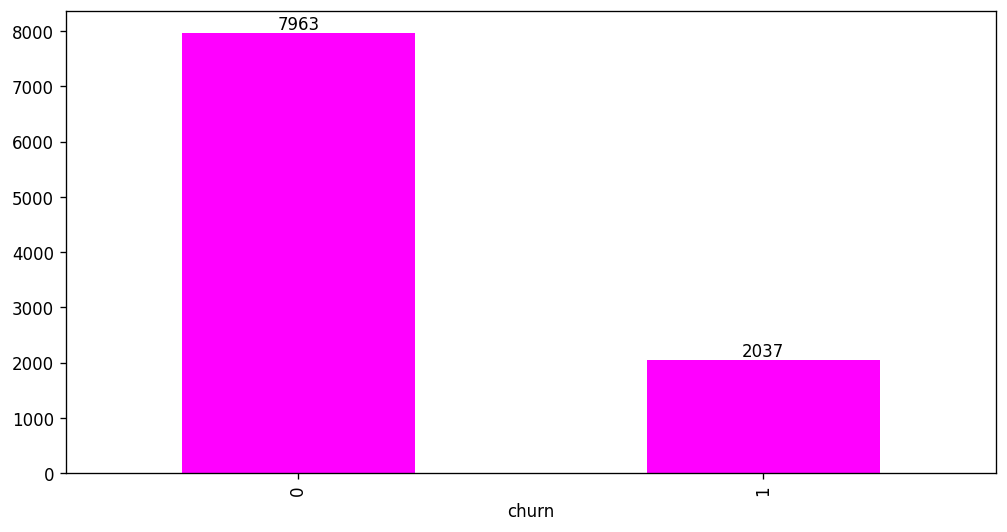

In [32]:
#kiểm tra cân bằng nhãn dự báo
u = df['churn'].value_counts().plot(kind = 'bar', color = 'magenta')
for container in u.containers:
  u.bar_label(container)
plt.show()

In [33]:
df.select_dtypes(include='object')

,country,gender
0,France,Female
1,Spain,Female
2,France,Female
3,France,Female
4,Spain,Female
...,...,...
9995,France,Male
9996,France,Male
9997,France,Female
9998,Germany,Male


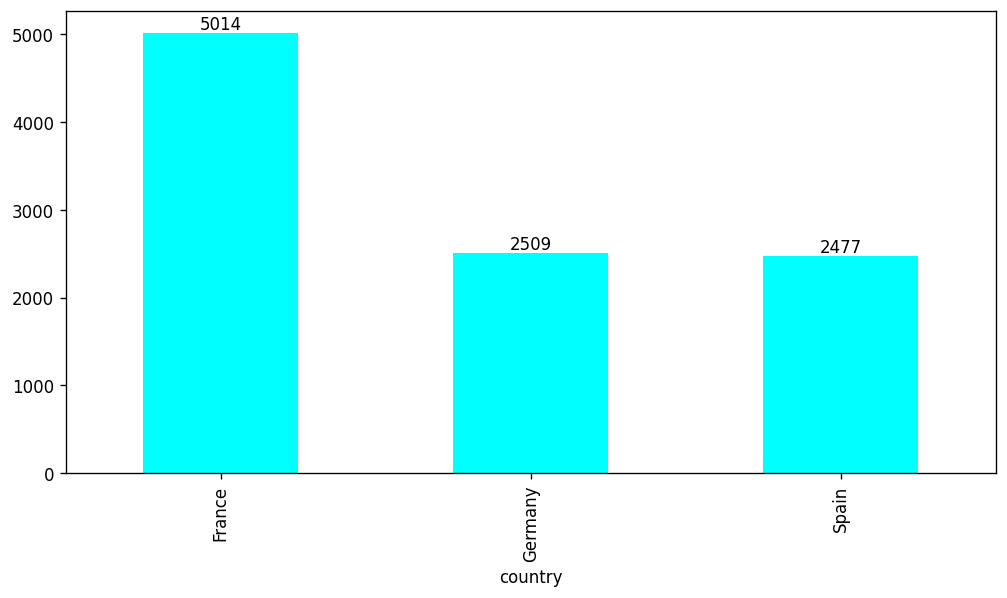

In [34]:
x = df['country'].value_counts().plot(kind = 'bar', color = 'cyan')
for container in x.containers:
  x.bar_label(container)
plt.show()

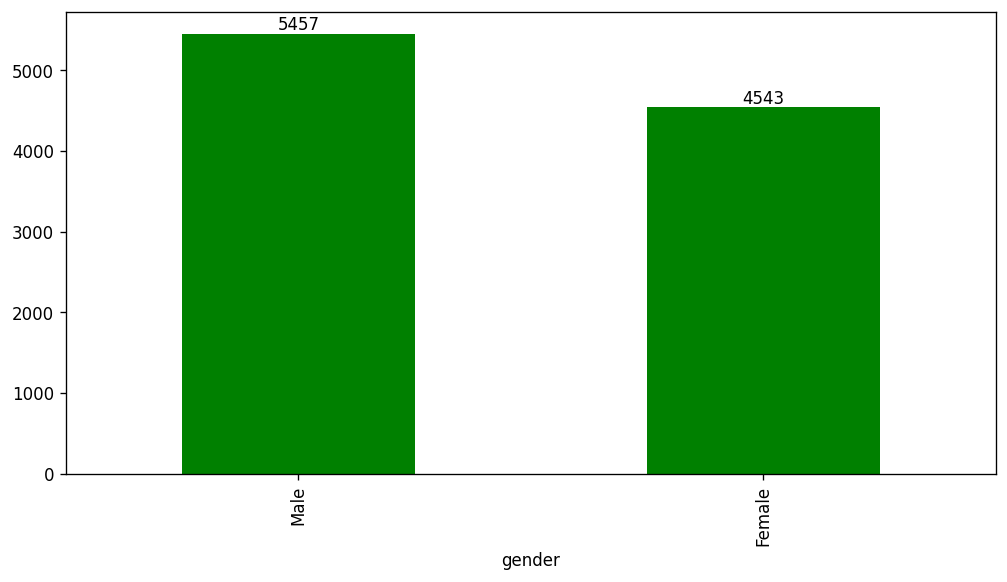

In [35]:
x = df['gender'].value_counts().plot(kind = 'bar', color = 'green')
for container in x.containers:
  x.bar_label(container)
plt.show()

In [36]:
df.select_dtypes(exclude='object').head(3)

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1


In [37]:
df.select_dtypes(include='number').describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,9801.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,101065.106289,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57100.263571,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,52449.620000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,101139.300000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149705.250000,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


<Axes: >

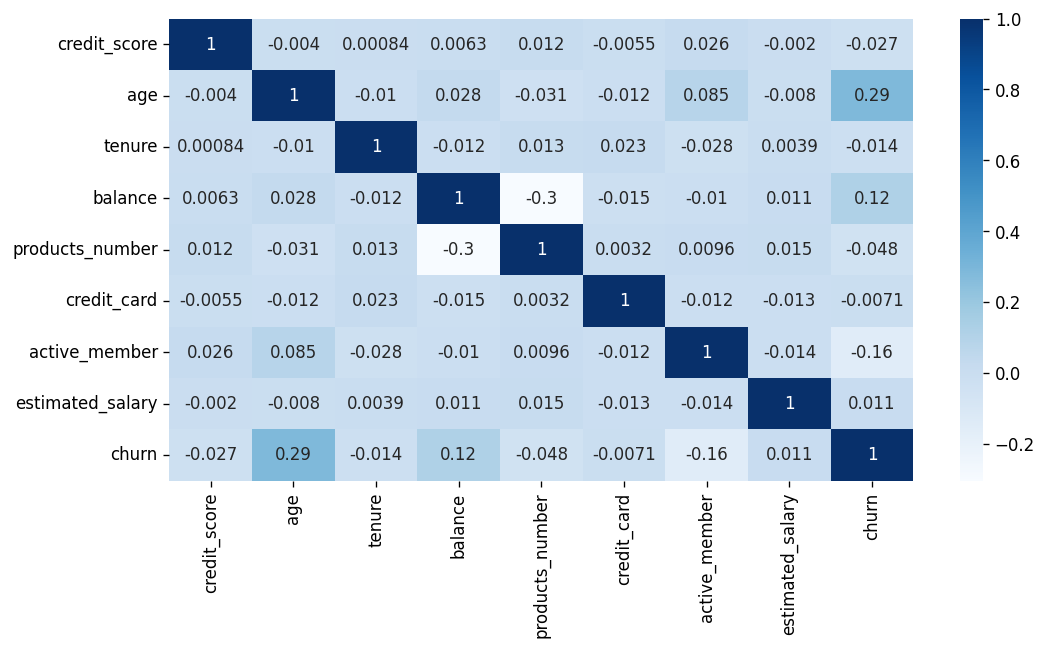

In [38]:
t = df.select_dtypes(exclude='object').drop('customer_id', axis = 1).corr()
sns.heatmap(t, annot = True, cmap = 'Blues')

<Axes: ylabel='Frequency'>

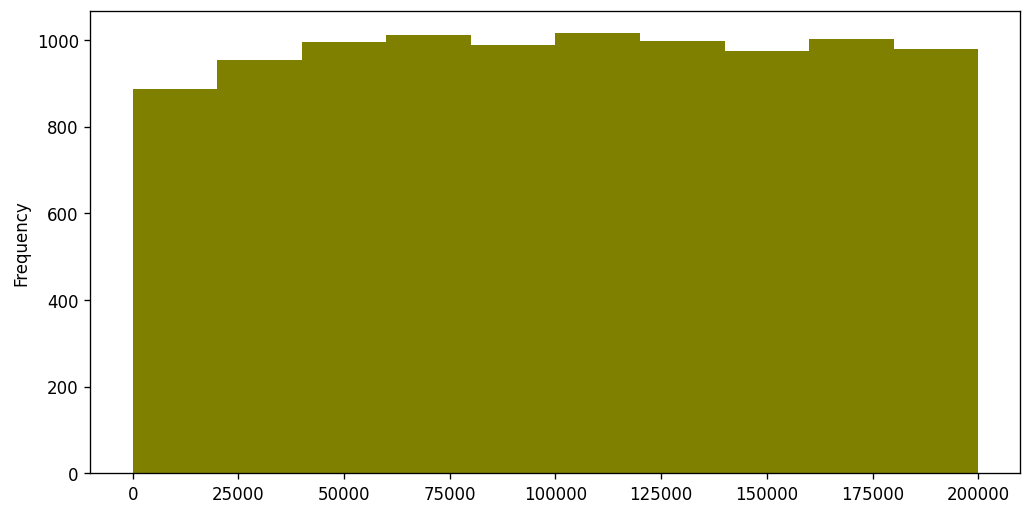

In [39]:
df['estimated_salary'].plot(kind ='hist', color = 'olive')

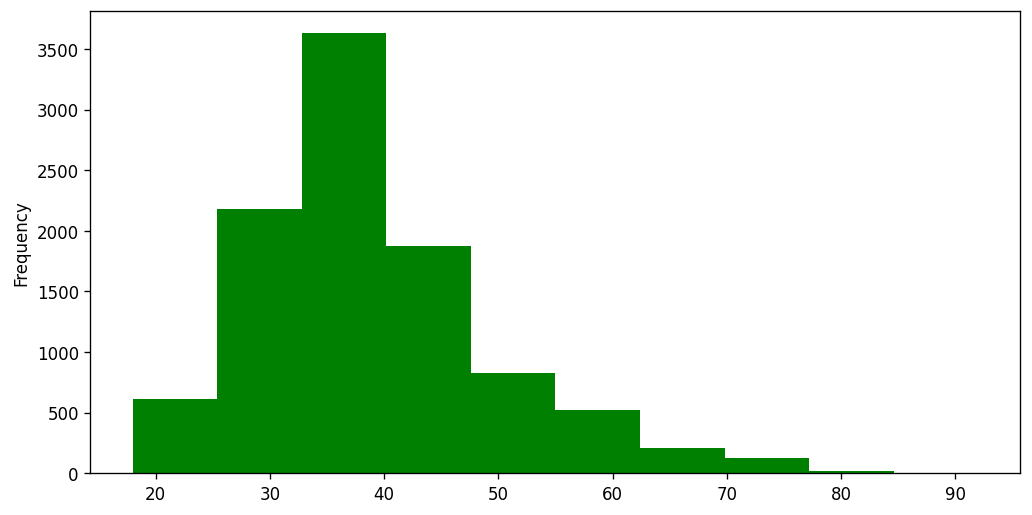

In [40]:
df['age'].plot(kind = 'hist', color = 'green');

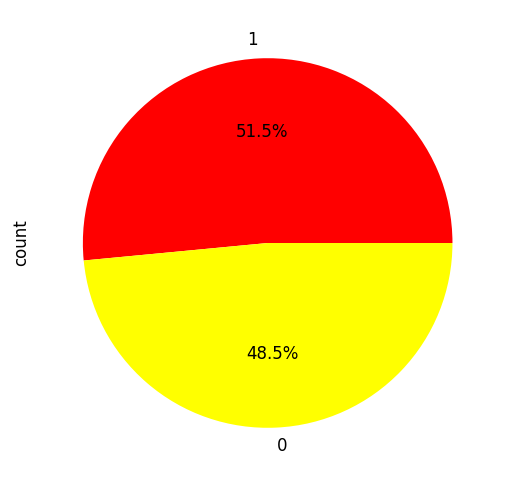

In [41]:
df['active_member'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', colors = ['red', 'yellow']);

In [42]:
#Encoder bằng onhot
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
df_one_array = ohe.fit_transform(df[['country', 'gender']]).toarray()
df_one = pd.DataFrame(df_one_array, columns = ohe.get_feature_names_out())
df_one
df.drop(['country', 'gender'], axis = 1, inplace = True)
df = pd.concat([df, df_one], axis = 1)
df

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain,gender_Female,gender_Male
0,15634602,619,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0,1.0,0.0
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0,1.0,0.0
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0,1.0,0.0
3,15701354,699,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0,1.0,0.0
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,39,5,0.00,2,1,0,96270.64,0,1.0,0.0,0.0,0.0,1.0
9996,15569892,516,35,10,57369.61,1,1,1,101699.77,0,1.0,0.0,0.0,0.0,1.0
9997,15584532,709,36,7,0.00,1,0,1,42085.58,1,1.0,0.0,0.0,1.0,0.0
9998,15682355,772,42,3,75075.31,2,1,0,92888.52,1,0.0,1.0,0.0,0.0,1.0


In [43]:
median_salary = df['estimated_salary'].median()
df['estimated_salary'] = df['estimated_salary'].apply(lambda x: median_salary if pd.isna(x) else x)


In [44]:
df.isna().sum()

customer_id         0
credit_score        0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
country_France      0
country_Germany     0
country_Spain       0
gender_Female       0
gender_Male         0
dtype: int64

In [45]:
#Scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = df.drop('churn', axis = 1)
y = df['churn']
x = pd.DataFrame(sc.fit_transform(x), columns = x.columns)
x

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_France,country_Germany,country_Spain,gender_Female,gender_Male
0,-0.783213,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.004994,0.997204,-0.578736,-0.573809,1.095988,-1.095988
1,-0.606534,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.203020,-1.002804,-0.578736,1.742740,1.095988,-1.095988
2,-0.995885,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.227593,0.997204,-0.578736,-0.573809,1.095988,-1.095988
3,0.144767,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.128081,0.997204,-0.578736,-0.573809,1.095988,-1.095988
4,0.652659,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.388889,-1.002804,-0.578736,1.742740,1.095988,-1.095988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-1.177652,1.246488,0.007457,-0.004426,-1.225848,0.807737,0.646092,-1.030670,-0.084844,0.997204,-0.578736,-0.573809,-0.912419,0.912419
9996,-1.682806,-1.391939,-0.373958,1.724464,-0.306379,-0.911583,0.646092,0.970243,0.011202,0.997204,-0.578736,-0.573809,-0.912419,0.912419
9997,-1.479282,0.604988,-0.278604,0.687130,-1.225848,-0.911583,-1.547768,0.970243,-1.043424,0.997204,-0.578736,-0.573809,1.095988,-1.095988
9998,-0.119356,1.256835,0.293517,-0.695982,-0.022608,0.807737,0.646092,-1.030670,-0.144677,-1.002804,1.727904,-0.573809,-0.912419,0.912419


In [46]:
#Chia tập train, test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state= 42)

## gulu xem có nên thêm cross validation ko nhé lười quá


# Bước 4: Xây dựng mô hình

<sử dụng các mô hình có sẵn trong các thư viện như sklearn, xgboost, lightgbm,.. để thực train các mô hình dự báo. Sau đó sử dụng các metric để tính toán các chỉ số đánh giá mô hình: ví dụ như sử dụng
classification_report để đánh giá mô hình phân loại>

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

dict = {
    'n_estimators': [10, 20, 30],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
#Model tuning: nói rõ các tham số cần tìm, cách thực hiện
grid = GridSearchCV(RandomForestClassifier(), dict, cv = 5)
grid.fit(x_train, y_train)
print(grid.best_params_)

{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 30}


              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1607
           1       0.78      0.43      0.55       393

    accuracy                           0.86      2000
   macro avg       0.83      0.70      0.74      2000
weighted avg       0.86      0.86      0.85      2000



<Axes: >

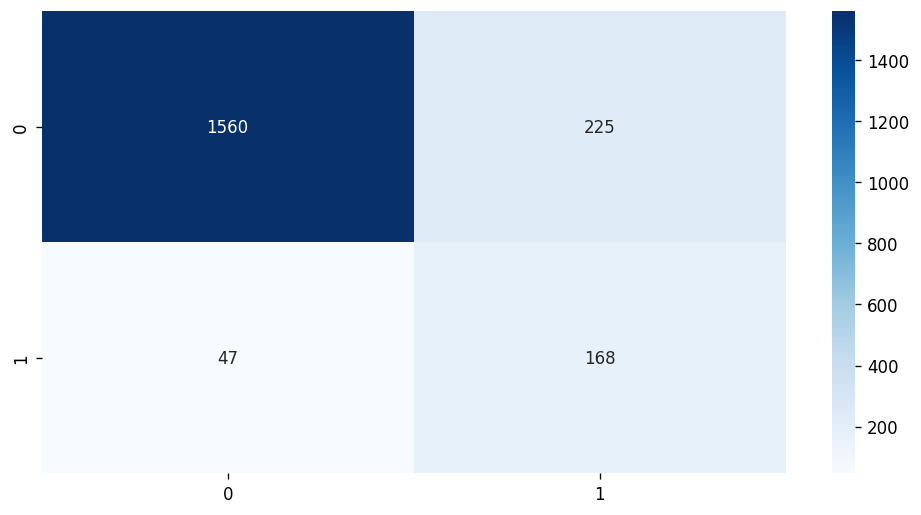

In [48]:
grid = RandomForestClassifier(max_depth = 10, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 20)
grid.fit(x_train, y_train)
y_pred = grid.predict(x_test)
print(classification_report(y_test, y_pred))
#ma trận nhầm lẫn
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_pred, y_test)
sns.heatmap(cf, annot = True, cmap = 'Blues', fmt = 'g')


# Bước 5: Tối ưu sai số bằng các kỹ thuật ensemble learning (nếu cần)

< khi sử dụng các mô hình riêng lẻ ở bước 4 nếu ra các kết quả dự báo k có sai số như mong muốn. Thường sẽ sử dụng các mô hình ensemble learning như bagging, boosting,... để cải thiện các kết quả dự báo>

In [49]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators = 100)
ada.fit(x_train, y_train)
y_pred = ada.predict(x_test)
print(classification_report(y_test, y_pred))

c:\Users\admin\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1607
           1       0.71      0.50      0.59       393

    accuracy                           0.86      2000
   macro avg       0.80      0.73      0.75      2000
weighted avg       0.85      0.86      0.85      2000



Sau khi cải thiện ta thấy các chỉ số đánh giá lớp 1 rất thấp. Vì thế:

# Bước 6: Tối ưu mô hình bằng cách xử lý mất cân bằng dữ liệu 

<Khi yêu cầu doanh nghiệp ưu tiên các chỉ số dự báo phải đi kèm với 1 mức độ rủi ro nào đó nhất định tùy nơi, chúng ta thường phải tối ưu lại dữ liệu tập train bằng cách sử dụng các thuật toán xử lý mất cân bằng dữ liệu nhưu SMOTE, Tomek Links, SMOTE + Tomek Links,... để tối ưu lại chỉ số mong muốn>

In [50]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x_train_sm, y_train_sm = sm.fit_resample(x_train, y_train)
xy_train_sm = pd.concat([x_train_sm, y_train_sm], axis = 1)


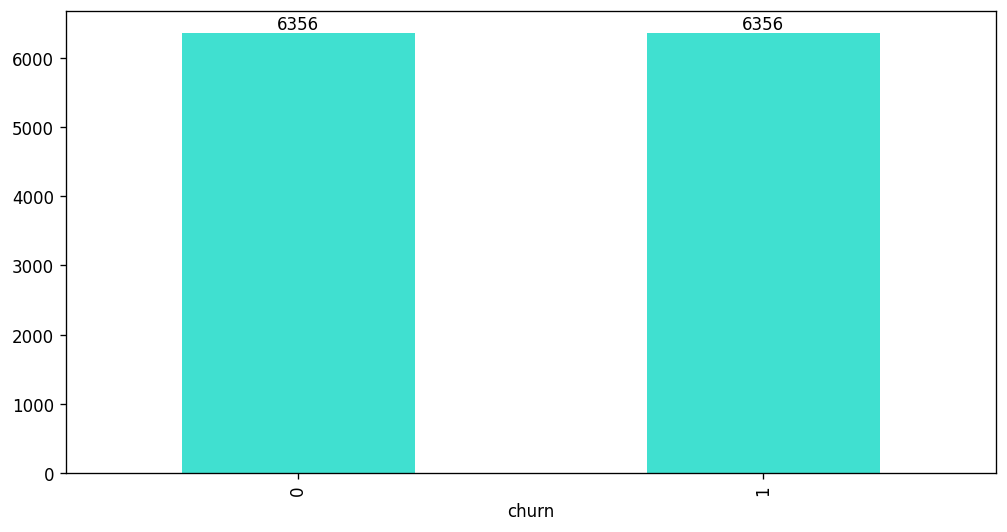

In [51]:
xy = xy_train_sm['churn'].value_counts().plot(kind = 'bar', color = 'turquoise')
for container in xy.containers:
  xy.bar_label(container)

In [52]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(estimator = grid, n_estimators = 100)
ada.fit(x_train_sm, y_train_sm)
y_pred = ada.predict(x_test)
print(classification_report(y_test, y_pred))

c:\Users\admin\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1607
           1       0.66      0.55      0.60       393

    accuracy                           0.86      2000
   macro avg       0.78      0.74      0.76      2000
weighted avg       0.85      0.86      0.85      2000



# Explainability and SHAP Analysis

## gulu ông tìm cách chạy cái này nữa nhé

In [53]:
import shap

In [60]:
import shap

explainer = shap.TreeExplainer(grid)
shap_values = explainer.shap_values(x_test)

# Visualize SHAP values for one sample
shap.plots.force(explainer.expected_value, shap_values)

# Visualize SHAP summary for all test samples
shap.summary_plot(shap_values, x_test)


TypeError: In v0.20, force plot now requires the base value as the first parameter! Try shap.plots.force(explainer.expected_value, shap_values) or for multi-output models try shap.plots.force(explainer.expected_value[0], shap_values[..., 0]).

- Force plot: Minh họa từng feature ảnh hưởng như thế nào đến dự đoán cụ thể. Các giá trị dương làm tăng xác suất churn, giá trị âm làm giảm xác suất churn.
- Summary plot: Biểu diễn tổng quan tác động của từng feature đến kết quả dự đoán, thể hiện mức độ ảnh hưởng của các feature trên toàn bộ tập dữ liệu.